### Start-up

In [1]:
%run cubes_e2e_refresh.py
#%matplotlib notebook

### Input spectra

Sky spectrum created and saved in SkyCalc_input_NEW_Out.fits.
Photons collected.
Input spectra created.
Sky spectrum imported from SkyCalc_input_NEW_Out.fits.


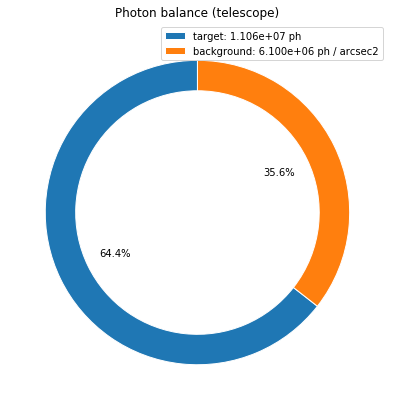

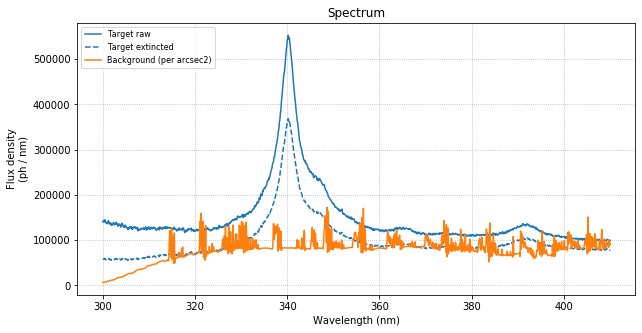

In [2]:
sim.spec_templ = 'custom'  # Template ('flat', 'PL', 'custom')
sim.spec_file = 'Zheng+97.txt'  # Path to file

sim.mag_syst = 'AB'  # System ('AB', 'Vega')
sim.mag_band = 'r'  # Band ('u', 'g', 'r', 'i', 'z' for AB, 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K' for Vega)
sim.targ_mag = 21  # Magnitude

sim.qso_zem = 1.8  # Emission redshift
sim.qso_lya_abs = False  # Lyman-alpha absorption

sim.airmass = 1.0  # Airmass
sim.pwv = 2.5  # Precipitable water vapor
sim.moond = 0  # Days from new moon
try:
    %run -i SkyCalc_Call.py
except:
    sim.bckg_mag = 22 # Background magnitude
    
sim.texp = 3600*au.s  # Exposure time
sim.spec_in()    

### PSF and slices

Slices designed on field.     


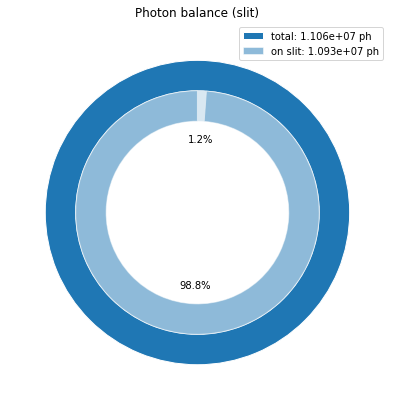

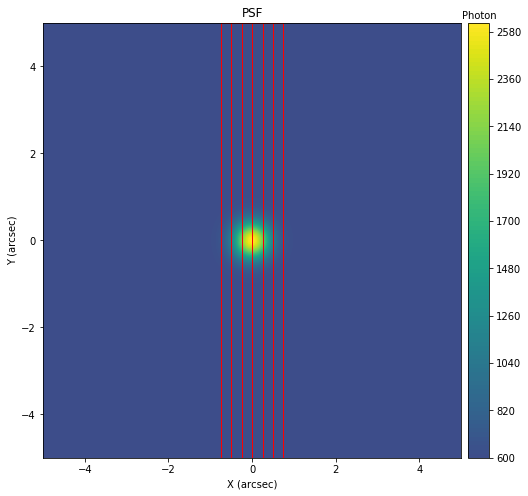

In [3]:
sim.psf_func = 'gaussian'  # Function to represent the PSF ('tophat', 'gaussian')
sim.seeing = 0.7*au.arcsec  # Seeing

sim.slice_n = 6  # Number of slices
sim.slice_length = 10*au.arcsec  # Length of the slice
sim.slice_width = 0.25*au.arcsec  # Width of the slice
sim.psf()

### Spectral format

Slices projected onto arms.       


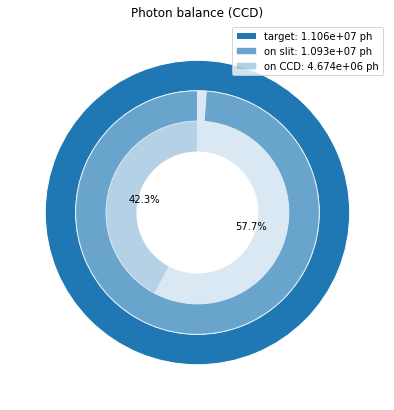

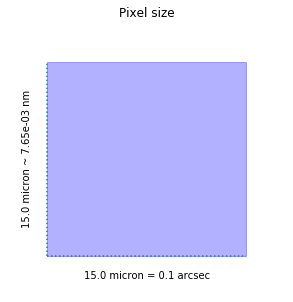

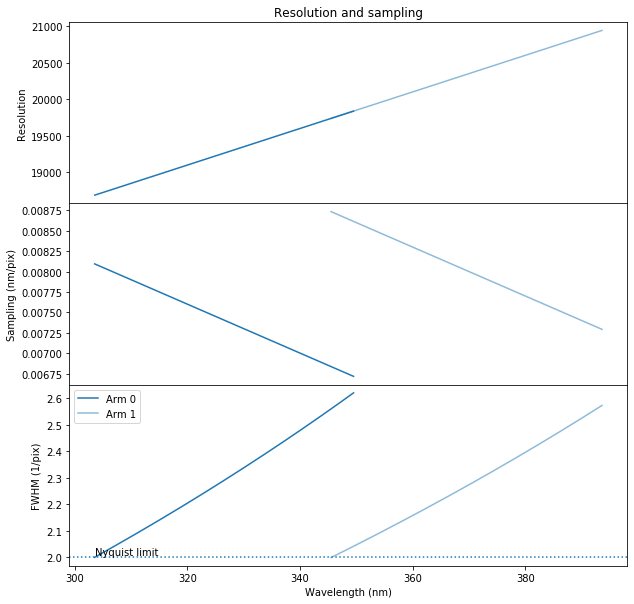

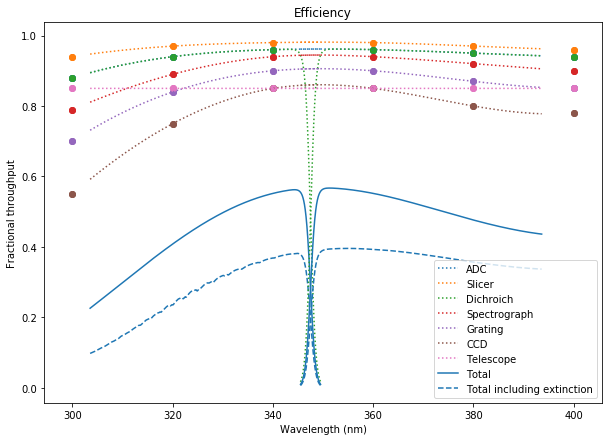

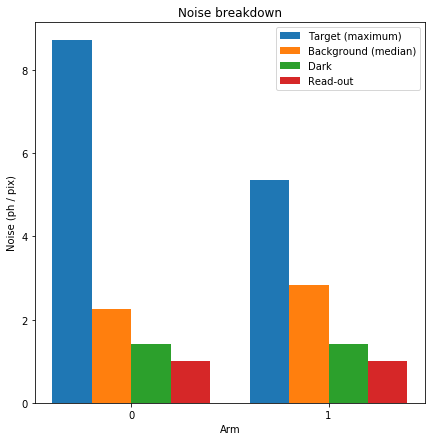

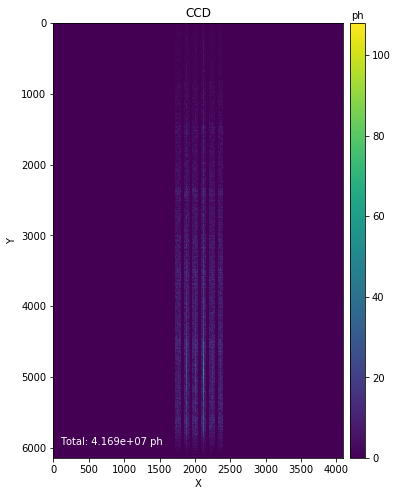

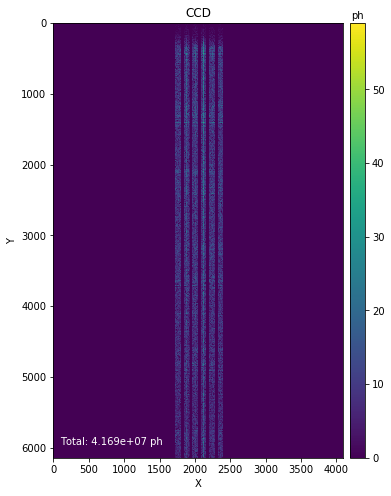

In [4]:
sim.ccd_gain = 1.1*au.photon/au.adu  # Gain (i.e. conversion from ADU to photons)
sim.ccd_ron = 1*au.photon / sim.ccd_gain  # Read-out noise (in ADU)
sim.ccd_dark = 2*au.photon/au.h / sim.ccd_gain  # Dark current (in ADU per unit time)
sim.ccd_xsize = 4096*au.pixel  # X size of the CCD 
#sim.ccd_ysize = 4096*au.pixel  # Y size of the CCD
sim.ccd_ysize = 6144*au.pixel  # Y size of the CCD
sim.pix_xsize = 15*au.micron  # X size of the pixels
sim.pix_ysize = 15*au.micron  # Y size of the pixels
sim.ccd_xbin = 1  # X binning of the CCD
sim.ccd_ybin = 1  # Y binning of the CCD

sim.arm_n = 2  # Number of arms
if sim.arm_n == 2:
    sim.wave_d = [347.5]*au.nm  # Wavelength of dichroich
if sim.arm_n == 3:
    sim.wave_d = [335, 362.5]*au.nm  # Wavelength of dichroichs
    
sim.eff_wave = [300, 320, 340, 360, 380, 400]*au.nm  # Wavelengths used to model efficiency
sim.eff_adc = [0.88, 0.94, 0.96, 0.96, 0.95, 0.94]  # ADC efficiency
sim.eff_slc = [0.94, 0.97, 0.98, 0.98, 0.97, 0.96]  # Slicer efficiency
sim.eff_dch = [0.88, 0.94, 0.96, 0.96, 0.95, 0.94]  # Dichroics efficiency
sim.eff_spc = [0.79, 0.89, 0.94, 0.94, 0.92, 0.90]  # Spectrograph efficiency
sim.eff_grt = [0.70, 0.84, 0.90, 0.90, 0.87, 0.85]  # Grating efficiency
sim.eff_ccd = [0.55, 0.75, 0.85, 0.85, 0.80, 0.78]  # CCD QE

sim.disp_wave = [300, 320, 340, 360, 380, 400]*au.nm  # Wavelengths used to model dispersion
sim.disp_sampl = [8.2e-3, 7.6e-3, 7.0e-3, 8.3e-3, 7.7e-3, 7.1e-3]*au.nm/au.pixel  # Dispersion sampling on CCD
sim.disp_resol = [1.86e4, 1.91e4, 1.96e4, 2.01e4, 2.06e4, 2.11e4]  # Resolution
sim.spat_scale = 0.25*au.arcsec/(30*au.micron)  # Spatial scale

sim.slice_gap = 40*au.pixel  # Gap between the slices
sim.ccd()

### Output spectrum

Slices extracted from arms.       


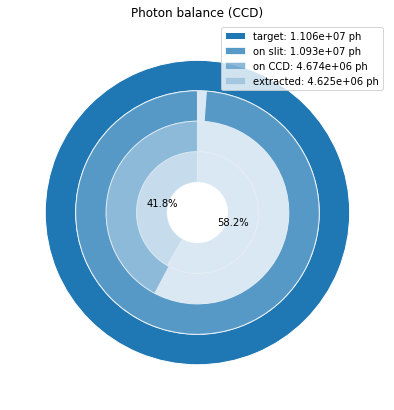

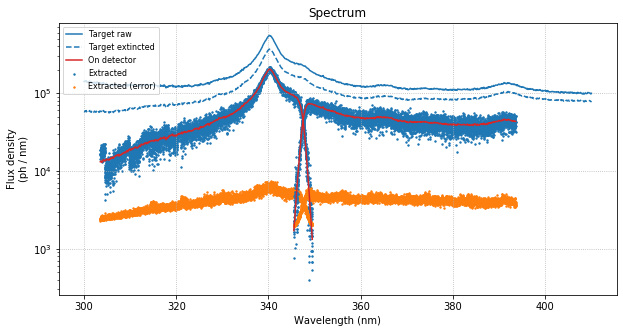

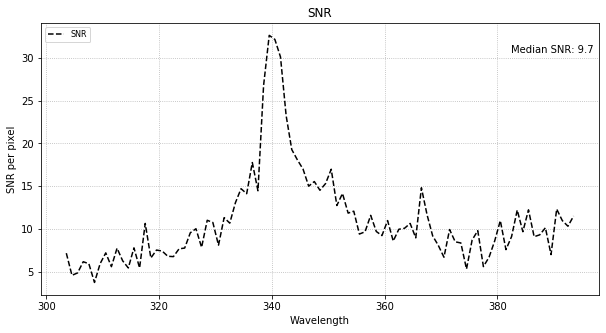

In [5]:
sim.extr_func = 'sum'  # Function for extracting the spectrum ('sum', 'opt' [very slow and not well tested])

sim.snr_sampl = 1*au.nm  # Data points per SNR point

sim.spec_draw()